In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# To play the audio files
import IPython.display as ipd
from IPython.display import Audio

# Keras and TensorFlow imports (updated)
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, BatchNormalization, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

# Suppress warnings
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Import TensorFlow
import tensorflow as tf 

print("Done")


Done


# Importing Data 

In [6]:
ravdess = "data/input/voice/"
ravdess_directory_list = os.listdir(ravdess)
ravdess_directory_list.sort()

print(ravdess_directory_list)
print('Isi Folder =',len(ravdess_directory_list))


['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']
Isi Folder = 24


# preprocessing

In [17]:
file_emotion = []
file_path = []

for i in ravdess_directory_list:
    actor_directory = os.path.join(ravdess, i)
    actor_files = os.listdir(actor_directory)
    
    for f in actor_files:
        part = f.split('.')[0].split('-')
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(actor_directory, f))

In [18]:
print(i)
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

Actor_24
03
data/input/voice/Actor_01\03-01-01-01-01-01-01.wav
8
03-01-08-02-02-02-24.wav


In [20]:
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)

ravdess_df.Emotions.replace({1: 'neutral', 2: 'neutral', 3: 'happy', 4: 'sad', 5: 'angry', 
                              6: 'fear', 7: 'disgust', 8: 'surprise'}, inplace=True)

print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())


  Emotions                                               Path
0  neutral  data/input/voice/Actor_01\03-01-01-01-01-01-01...
1  neutral  data/input/voice/Actor_01\03-01-01-01-01-02-01...
2  neutral  data/input/voice/Actor_01\03-01-01-01-02-01-01...
3  neutral  data/input/voice/Actor_01\03-01-01-01-02-02-01...
4  neutral  data/input/voice/Actor_01\03-01-02-01-01-01-01...
______________________________________________
      Emotions                                               Path
1435  surprise  data/input/voice/Actor_24\03-01-08-01-02-02-24...
1436  surprise  data/input/voice/Actor_24\03-01-08-02-01-01-24...
1437  surprise  data/input/voice/Actor_24\03-01-08-02-01-02-24...
1438  surprise  data/input/voice/Actor_24\03-01-08-02-02-01-24...
1439  surprise  data/input/voice/Actor_24\03-01-08-02-02-02-24...
_______________________________________________
Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dty

In [22]:
data_path = ravdess_df
data_path.to_csv("data/output/data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,data/input/voice/Actor_01\03-01-01-01-01-01-01...
1,neutral,data/input/voice/Actor_01\03-01-01-01-01-02-01...
2,neutral,data/input/voice/Actor_01\03-01-01-01-02-01-01...
3,neutral,data/input/voice/Actor_01\03-01-01-01-02-02-01...
4,neutral,data/input/voice/Actor_01\03-01-02-01-01-01-01...


In [23]:
print(data_path.Emotions.value_counts())


Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dtype: int64


>*                          Visualisasi dan Eksplorasi Data


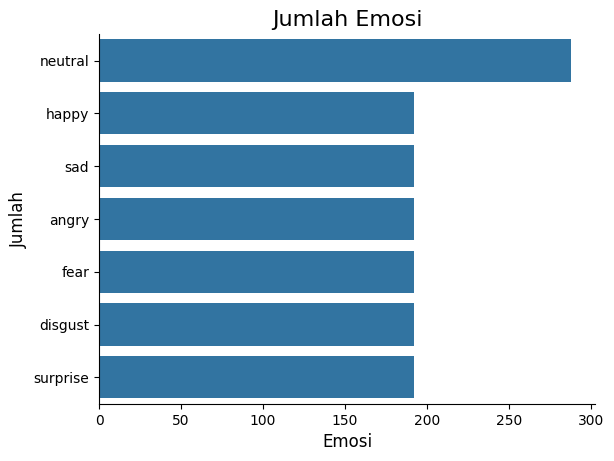

In [24]:
plt.title('Jumlah Emosi', size=16)  # Judul grafik
sns.countplot(data_path.Emotions)  # Membuat grafik jumlah emosi
plt.ylabel('Jumlah', size=12)  # Label sumbu y
plt.xlabel('Emosi', size=12)  # Label sumbu x
sns.despine(top=True, right=True, left=False, bottom=False)  # Menghapus garis tepi atas dan kanan
plt.show()  # Menampilkan grafik


In [25]:
data,sr = librosa.load(file_path[0])
sr

22050

In [26]:
ipd.Audio(data,rate=sr)

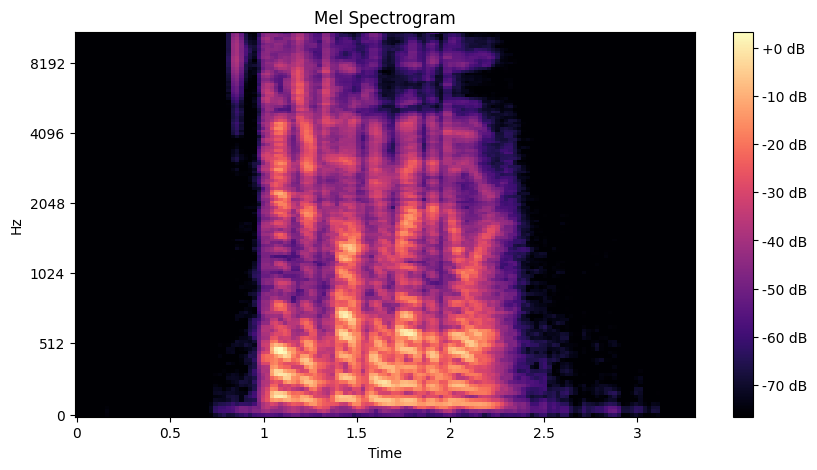

In [27]:
#Buat Mel spectrogram
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time')

plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

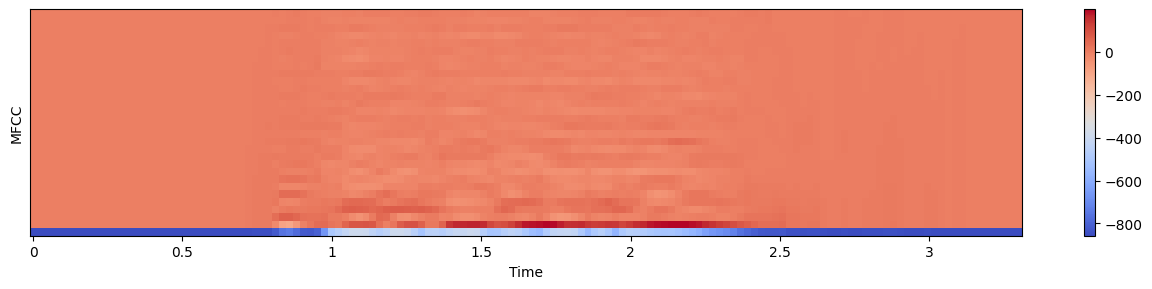

In [28]:
# Compute MFCC
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)

# Plot MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

# Play the audio
ipd.Audio(data, rate=sr)

# Data augmentation

In [29]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCHED AUDIO
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate) 
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor) 


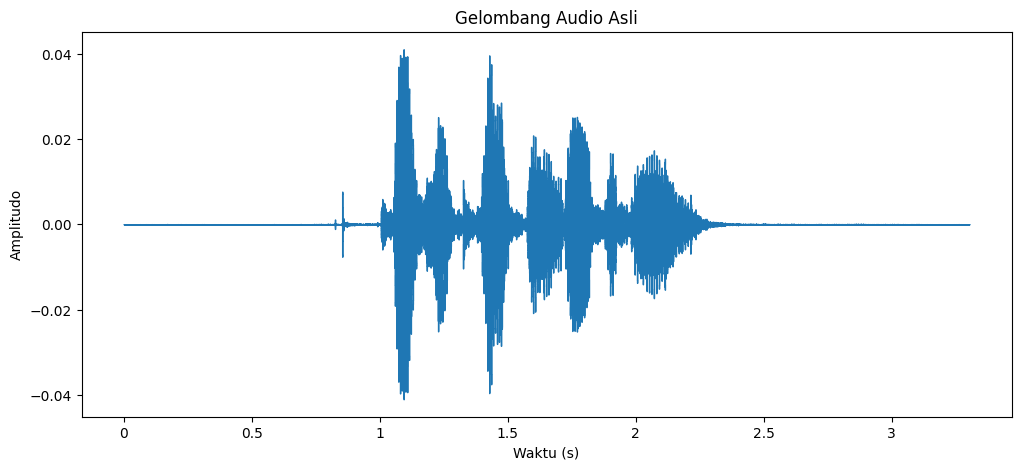

In [30]:
# NORMAL AUDIO
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
plt.title("Gelombang Audio Asli")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")

# Memutar audio
ipd.Audio(data, rate=sr)

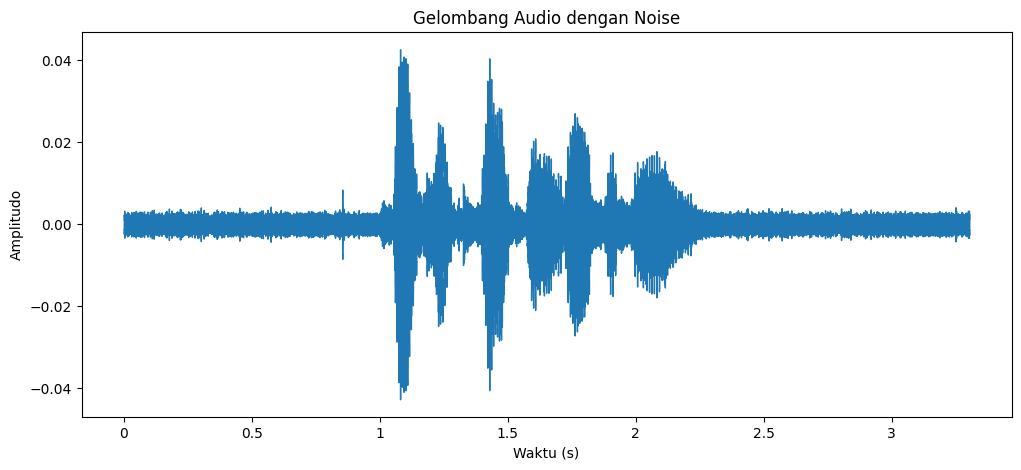

In [31]:
# Audio dengan Noise
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
plt.title("Gelombang Audio dengan Noise")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")

# Memutar audio
ipd.Audio(x, rate=sr)


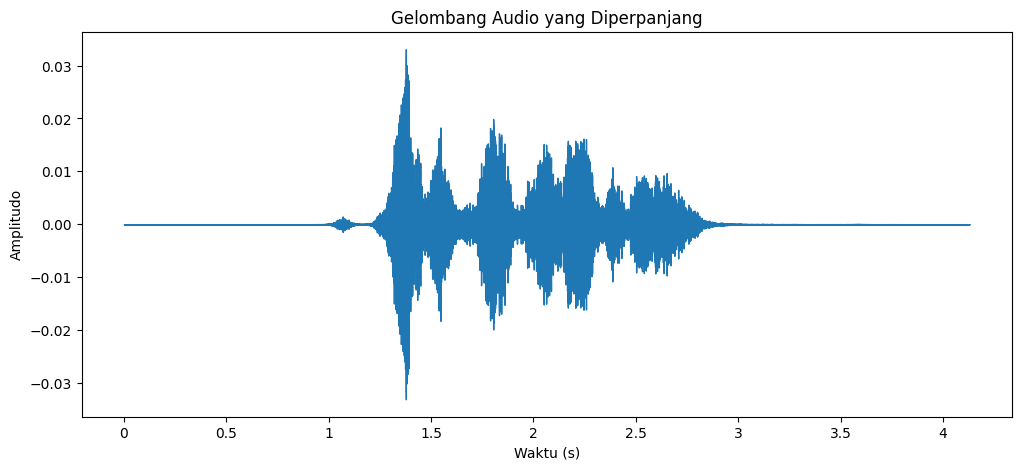

In [32]:
# Audio yang Diperpanjang (Stretched)
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
plt.title("Gelombang Audio yang Diperpanjang")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")

# Memutar audio
ipd.Audio(x, rate=sr)


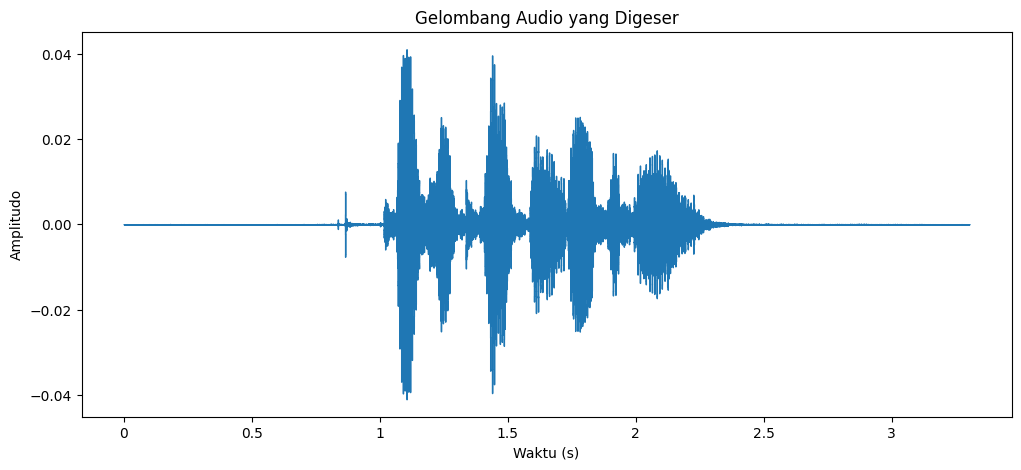

In [33]:
# Audio yang Digeser (Shifted)
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
plt.title("Gelombang Audio yang Digeser")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")

# Memutar audio
ipd.Audio(x, rate=sr)


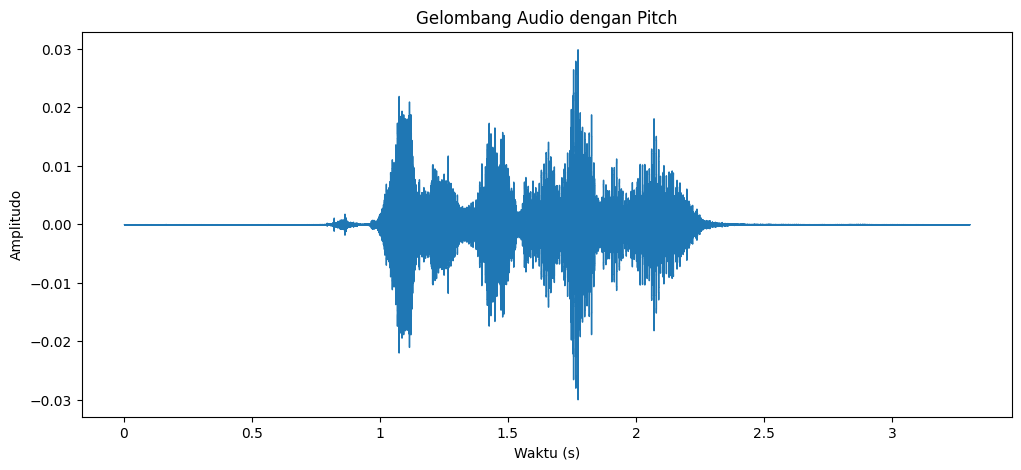

In [34]:
# Audio dengan Pitch 

x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
plt.title("Gelombang Audio dengan Pitch")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")

# Memutar audio
ipd.Audio(x, rate=sr)


# Feature extraction

In [61]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rms_features = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rms_features)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_features = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13, hop_length=hop_length, n_fft=frame_length)
    return np.squeeze(mfcc_features.T) if not flatten else np.ravel(mfcc_features.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    
    return audio


In [62]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  8


# Normal way to get features


In [63]:
import timeit
from tqdm import tqdm



start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index == 100:
        print(f'{index} audio has been processed')
        break
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)         

100it [01:28,  1.14it/s]

100 audio has been processed
Done
Time:  88.0830492998939


In [65]:
print(len(X), len(Y), data_path.Path.shape)


400 400 (1440,)


# Saving features


In [66]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('data\output\emotion.csv', index=False)
Emotions.head()


,0,1,2,3,4,5,6,7,8,9,...,1611,1612,1613,1614,1615,1616,1617,1618,1619,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.816714,0.812341,0.807019,0.800742,0.793534,0.785372,0.776301,0.766315,0.755441,neutral
1,0.254395,0.385254,0.516113,0.514160,0.518066,0.506836,0.496094,0.499023,0.496582,0.503906,...,-5.512657,-7.207232,-3.330200,-1.173874,-3.746516,-8.067048,-1.343850,1.378826,4.087754,neutral
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,0.007222,0.007180,0.007128,0.007062,0.006994,0.006906,0.006816,0.006713,0.006601,neutral
3,0.258301,0.387695,0.513184,0.508789,0.503418,0.501953,0.504883,0.500000,0.504883,0.503418,...,-4.261962,-1.151724,1.226609,-1.489946,-2.865002,0.150069,0.863596,6.681363,6.782862,neutral
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [67]:
Emotions = pd.read_csv('data\output\emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,1611,1612,1613,1614,1615,1616,1617,1618,1619,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.816714,0.812341,0.807019,0.800742,0.793534,0.785372,0.776301,0.766315,0.755441,neutral
1,0.254395,0.385254,0.516113,0.514160,0.518066,0.506836,0.496094,0.499023,0.496582,0.503906,...,-5.512657,-7.207232,-3.330200,-1.173874,-3.746516,-8.067048,-1.343850,1.378826,4.087754,neutral
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,0.007222,0.007180,0.007128,0.007062,0.006994,0.006906,0.006816,0.006713,0.006601,neutral
3,0.258301,0.387695,0.513184,0.508789,0.503418,0.501953,0.504883,0.500000,0.504883,0.503418,...,-4.261962,-1.151724,1.226609,-1.489946,-2.865002,0.150069,0.863596,6.681363,6.782862,neutral
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [68]:
print(Emotions.isna().any())


0           False
1           False
2           False
3           False
4           False
            ...  
1616        False
1617        False
1618        False
1619        False
Emotions    False
Length: 1621, dtype: bool


In [69]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
1616        False
1617        False
1618        False
1619        False
Emotions    False
Length: 1621, dtype: bool


(400, 1621)

In [70]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
1616        0
1617        0
1618        0
1619        0
Emotions    0
Length: 1621, dtype: int64

# Data preparation

In [71]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [72]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [73]:
print(Y.shape)

X.shape

(400, 7)


(400, 1620)

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((320, 1620), (320, 7), (80, 1620), (80, 7))

In [75]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [76]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((320, 1620), (320, 7), (80, 1620), (80, 7))

In [78]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, BatchNormalization, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD


In [82]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)


# LSTM Model

In [85]:
model01 = Sequential()
model01.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model01.add(Dropout(0.2))
model01.add(LSTM(128, return_sequences=True))
model01.add(LSTM(128, return_sequences=True))
model01.add(LSTM(128, return_sequences=True))
model01.add(LSTM(128, return_sequences=True))
model01.add(LSTM(128))
model01.add(Dense(7, activation='softmax'))

model01.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model01.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 1620, 128)      │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1620, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 1620, 128)      │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 1620, 128)      │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 1620, 128)      │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 1620, 128)      │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725,383 (2.77 MB)

 Trainable params: 725,383 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
hist = model01.fit(X_train, y_train,
                   epochs=20,
                   validation_data=(X_test, y_test),
                   batch_size=64,
                   verbose=1)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2054s 429s/step - accuracy: 0.1785 - loss: 1.9284 - val_accuracy: 0.2625 - val_loss: 1.8175
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1887s 385s/step - accuracy: 0.2147 - loss: 1.8471 - val_accuracy: 0.1500 - val_loss: 1.8492
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2166s 426s/step - accuracy: 0.2229 - loss: 1.8010 - val_accuracy: 0.2500 - val_loss: 1.7383
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1876s 352s/step - accuracy: 0.2135 - loss: 1.7623 - val_accuracy: 0.2375 - val_loss: 1.7675
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1992s 406s/step - accuracy: 0.2527 - loss: 1.7051 - val_accuracy: 0.1750 - val_loss: 1.7170
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1904s 370s/step - accuracy: 0.2473 - loss: 1.6687 - val_accuracy: 0.1625 - val_loss: 1.7621
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1676s 321s/step - accuracy: 0.2632 - loss: 1.6787 - val_accuracy: 0.2625 - val_loss: 1.7338
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1599s 296s/step - accuracy: 0.2948 - loss: 1.6772 - val_accuracy: 0.

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2656 - loss: 1.7654
Akurasi model kita pada data uji :  25.0 %


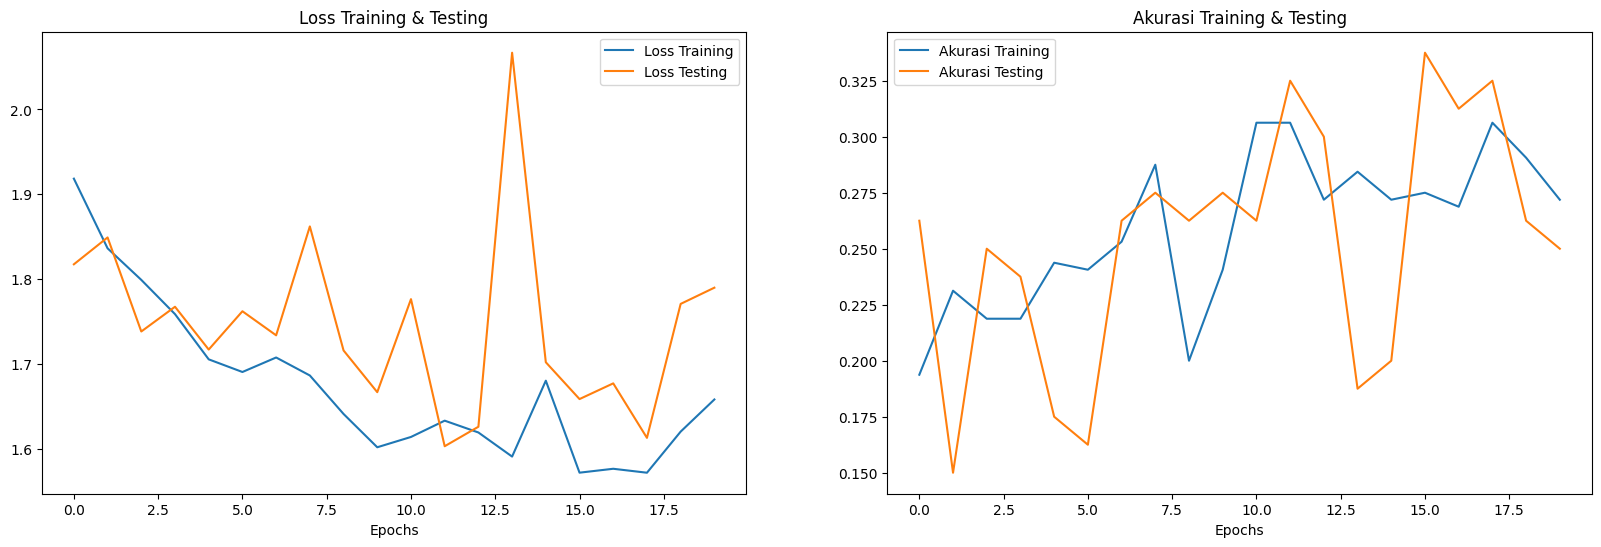

In [87]:
print("Akurasi model kita pada data uji : " , model01.evaluate(X_test, y_test)[1] * 100, "%")

# Menyiapkan epoch
epochs = [i for i in range(20)]
fig, ax = plt.subplots(1, 2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
test_acc = hist.history['val_accuracy']
test_loss = hist.history['val_loss']

# Ukuran gambar
fig.set_size_inches(20, 6)

# Plotting Loss
ax[0].plot(epochs, train_loss, label='Loss Training')
ax[0].plot(epochs, test_loss, label='Loss Testing')
ax[0].set_title('Loss Training & Testing')
ax[0].legend()
ax[0].set_xlabel("Epochs")

# Plotting Akurasi
ax[1].plot(epochs, train_acc, label='Akurasi Training')
ax[1].plot(epochs, test_acc, label='Akurasi Testing')
ax[1].set_title('Akurasi Training & Testing')
ax[1].legend()
ax[1].set_xlabel("Epochs")

plt.show()


# CNN model

In [88]:
x_traincnn = np.expand_dims(x_train, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)

print(x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape)

# Example akses data pertama setelah reshape
# print(x_testcnn[0])


(320, 1620, 1) (320, 7) (80, 1620, 1) (80, 7)


In [93]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    Dropout(0.2),
    
    L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    
    L.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    Dropout(0.2),
    
    L.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3, strides=2, padding='same'),
    Dropout(0.2),
    
    L.Flatten(),
    L.Dense(512, activation='relu'),
    L.BatchNormalization(),
    L.Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 1620, 512)      │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1620, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 810, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 810, 512)       │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 810, 512)       │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 405, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 405, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 405, 256)       │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 405, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 203, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 203, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 203, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 102, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 102, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 102, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 102, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 51, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 51, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6528)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │     3,342,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │         3,59

 Total params: 5,620,359 (21.44 MB)

 Trainable params: 5,616,007 (21.42 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [95]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [96]:
history = model.fit(
    x_traincnn, 
    y_train, 
    epochs=100,  # Adjust as needed
    batch_size=32,  # Adjust as needed
    validation_split=0.2,  # Using 20% of training data for validation
    callbacks=[model_checkpoint, early_stop, lr_reduction]
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 51s 6s/step - accuracy: 0.7001 - loss: 0.8404 - val_accuracy: 0.4375 - val_loss: 1.5027 - learning_rate: 0.0010
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.8933 - loss: 0.3304 - val_accuracy: 0.4375 - val_loss: 1.5985 - learning_rate: 0.0010
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - accuracy: 0.9072 - loss: 0.2981 - val_accuracy: 0.2969 - val_loss: 2.2627 - learning_rate: 0.0010
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9540 - loss: 0.1166
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
8/8 ━━━━━━━━━━━━━━━━━━━━ 54s 7s/step - accuracy: 0.9544 - loss: 0.1175 - val_accuracy: 0.2188 - val_loss: 3.3663 - learning_rate: 0.0010
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 7s/step - accuracy: 0.9908 - loss: 0.0549 - val_accuracy: 0.2188 - val_loss: 3.4603 - learning_rate: 5.0000e-04
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 56s 7s/step - accuracy: 0.9974 - loss: 0.0403 - val_accuracy: 0.2188

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2875 - loss: 1.6900
Akurasi model pada data uji:  32.499998807907104 %


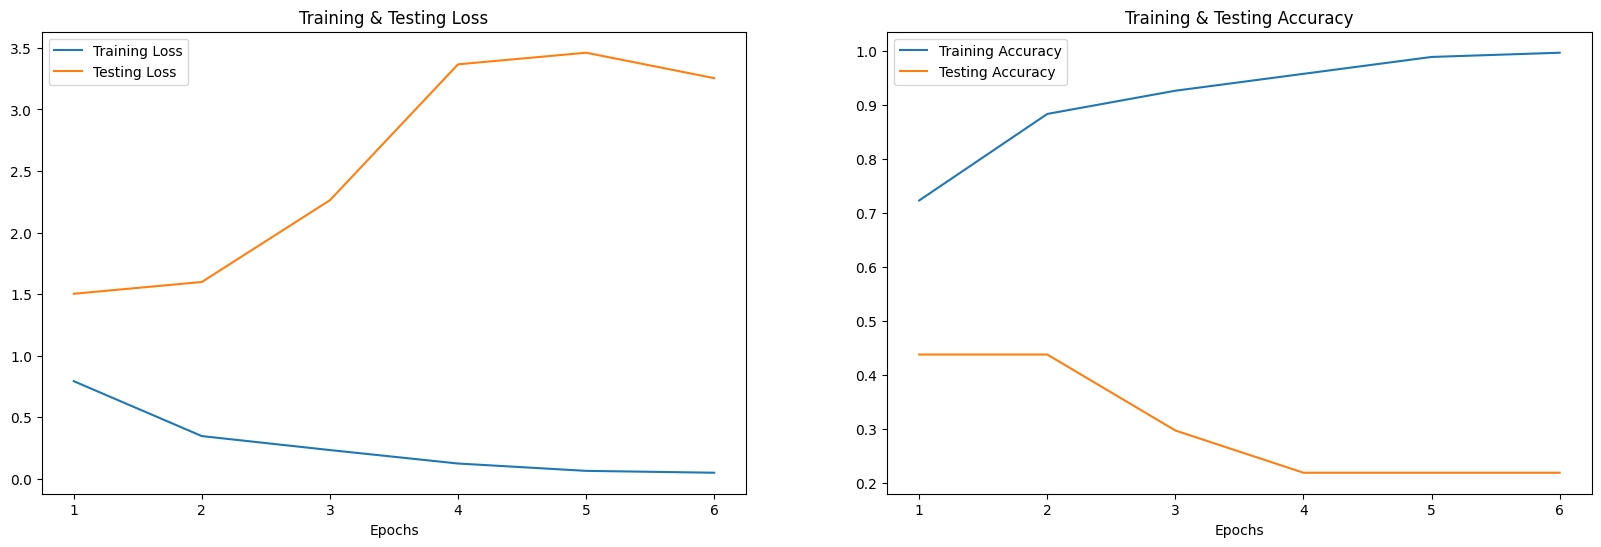

In [98]:
print("Akurasi model pada data uji: ", model.evaluate(x_testcnn, y_test)[1] * 100, "%")

# Get the actual number of epochs from the history
epochs = range(1, len(history.history['accuracy']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

# Plot untuk Training & Testing Loss
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

# Plot untuk Training & Testing Accuracy
ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")

plt.show()

In [99]:
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


,Predicted Labels,Actual Labels
0,sad,surprise
1,disgust,neutral
2,sad,neutral
3,sad,surprise
4,sad,sad
5,fear,sad
6,sad,sad
7,happy,sad
8,sad,neutral
9,disgust,angry


# Evalutation

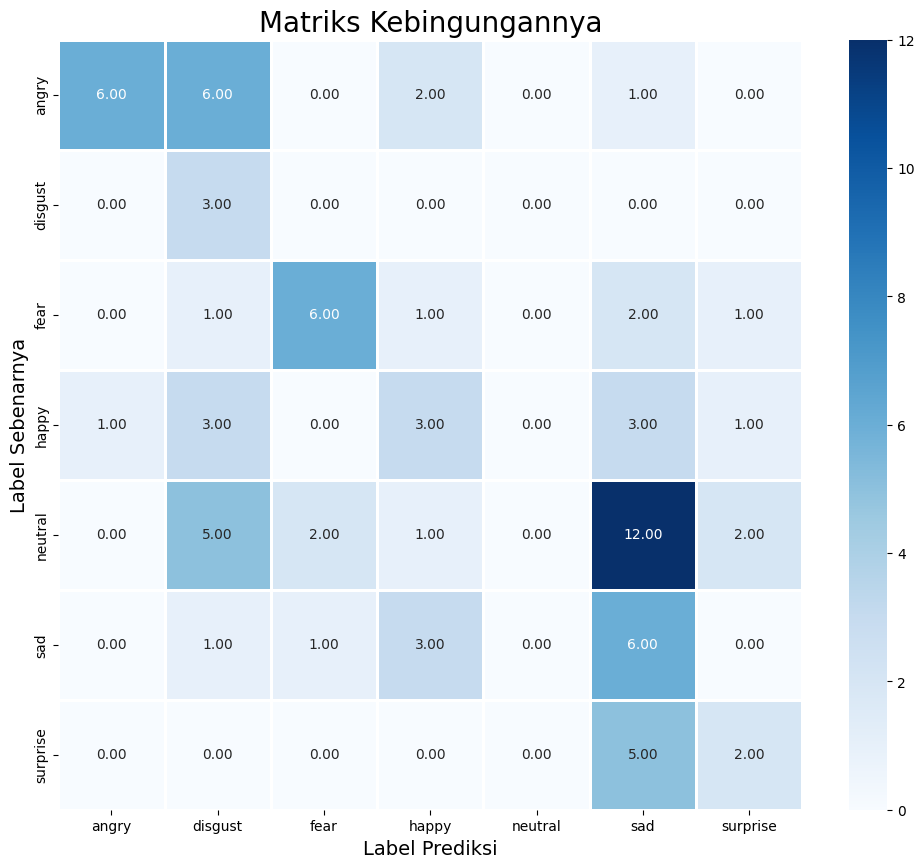

              precision    recall  f1-score   support

       angry       0.86      0.40      0.55        15
     disgust       0.16      1.00      0.27         3
        fear       0.67      0.55      0.60        11
       happy       0.30      0.27      0.29        11
     neutral       0.00      0.00      0.00        22
         sad       0.21      0.55      0.30        11
    surprise       0.33      0.29      0.31         7

    accuracy                           0.33        80
   macro avg       0.36      0.44      0.33        80
weighted avg       0.36      0.33      0.30        80



In [100]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize=(12, 10))
cm = pd.DataFrame(cm, index=[i for i in encoder.categories_], columns=[i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Matriks Kebingungannya', size=20)
plt.xlabel('Label Prediksi', size=14)
plt.ylabel('Label Sebenarnya', size=14)
plt.show()


print(classification_report(y_test0, y_pred0))

# Save Model


In [102]:
from tensorflow.keras.models import Sequential, model_from_json

model.summary()

# Menyimpan model dalam format JSON
model_json = model.to_json()
with open("Best_model.json", "w") as json_file:
    json_file.write(model_json)

# Menyimpan bobot model dalam format HDF5
model.save_weights("Best_model.weights.h5")
print("Model dan bobot telah disimpan ke disk")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 1620, 512)      │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1620, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 810, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 810, 512)       │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 810, 512)       │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 405, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 405, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 405, 256)       │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 405, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 203, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 203, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 203, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 102, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 102, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 102, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 102, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 51, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 51, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6528)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │     3,342,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │         3,59

 Total params: 16,852,375 (64.29 MB)

 Trainable params: 5,616,007 (21.42 MB)

 Non-trainable params: 4,352 (17.00 KB)

 Optimizer params: 11,232,016 (42.85 MB)

Model dan bobot telah disimpan ke disk


In [103]:
from tensorflow.keras.models import Sequential, model_from_json

json_file = open('Best_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("best_model1_weights.keras")

print("Model berhasil dimuat dari disk")

Model berhasil dimuat dari disk


In [104]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

score = loaded_model.evaluate(x_testcnn, y_test)

print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 981ms/step - accuracy: 0.2875 - loss: 1.6900
compile_metrics: 32.50%


In [ ]:
""""import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")    """